# 0. Application of the K-NN method to the classification problem

The provided dataset comes from the 1994 census and contains information about a certain number of people living in the United States. The problem is to predict whether or not a person earns more than $50k per year. List of features:

*   <b>age</b>: age of a person.
*   <b>workclass</b>: the employment status of an individual.
*   <b>fnlwgt</b>: final weight, representing the number of individuals that this row represents (a representative sample).
*   <b>education</b>: highest level of education achieved by an individual.
*   <b>education-num</b>: highest level of education achieved by an individual in numerical form.
*   <b>marital-status</b>: marital status of an individual. Note that Married-civ-spouse refers to a civilian spouse, and Married-AF-spouse refers to a spouse in the Armed Forces.
*   <b>occupation</b>: general type of occupation of an individual.
*   <b>relationship</b>: relationship of this individual with others, for example, spouse (Husband). Each data point has only one relationship (echoing the <b>marital-status</b> feature).
*   <b>race</b>: race.
*   <b>sex</b>: biological sex of an individual.
*   <b>capital-gain</b>: capital gains of an individual.
*   <b>capital-loss</b>: capital losses of an individual.
*   <b>hours-per-week</b>: number of hours the individual reported working per week.
*   <b>native-country</b>: country of origin.
*   <b>label</b>: income (target), more than $50,000 (>50K) or not (<=50K).



## A bit about model quality metrics

First, let's look at the so-called confusion matrix -- a way to divide objects into $4$ groups depending on the combination of the true class and the classifier prediction:

-   TP (True Positives) -- correctly classified objects originally belonging to the class "$+1$";

-   TN (True Negatives) -- correctly classified objects originally belonging to the class "$-1$";

-   FN (False Negatives) -- misclassified objects that originally belonged to the class "$+1$" (type I error);

-   FP (False Positives) -- misclassified objects that originally belonged to the class "$-1$" (type II error).

Usually, of course, it is not absolute rates that are used, but relative ones (rates), ranging from $0$ to $1$:

-   proportion of correct classifier predictions (so-called accuracy): $$\mathsf{Accuracy} = \frac{TP + TN}{TP + FP + FN + TN}.$$ This value shows the ratio of the number of correctly classified objects to the total number of classified objects and, roughly speaking, estimates the probability of a random object to be correctly classified.

-   proportion of true positive predictions -- True Positives Rate (TPR), or Sensitivity, or Recall: $$\mathsf{T P R}=\frac{T P}{T P+F N}.$$ This value shows the ratio of the number of correctly classified objects belonging to class "$+1$" to the total number of objects belonging to class "$+1$". In other words, it is an estimate of the probability that an object belonging to class "$+1$" will be correctly classified.

-   proportion of false positive predictions -- False Positives Rate (FPR): $$\mathsf{F P R}=\frac{F P}{FP + TN}.$$ The value indicates the ratio of the number of misclassified objects belonging to class "$-1$" to the total number of objects of class "$-1$", or estimates the probability that an object belonging to class "$-1$" will be misclassified.

-   Specificity or True Negatives Rate (TNR): $$\mathsf{TNR} = 1 - \mathsf{F P R} =\frac{T N}{T N+F P}.$$ The value indicates the ratio of the number of correctly classified objects belonging to class "$-1$" to the total number of objects of class "$-1$", or estimates the probability that an object belonging to class "$-1$" will be classified correctly.

-   Precision: $$\mathsf{Precision} =\frac{TP}{TP + FP}.$$ The value indicates what proportion of objects assigned to the "$+1$" class by the classifier actually belong to this class.

The question that naturally arises is whether there is some generalizable criterion,
that can characterize the quality of the model. One of them is
the so-called $F$-measure ($F_1$-measure, $F$ score, $F_1$ score).
is defined by the following relationship:
$$F = F_1 = 2 \cdot \frac{\mathsf{Precision} \cdot \mathsf{Recall}}{\mathsf{Precision} + \mathsf{Recall}}.$$

**Remark**. *The $F$-measure is the harmonic mean of the values
$\mathsf{Precision}$ and $\mathsf{Recall}$ and is in the range of
$[0, 1]$. The harmonic mean has an important property: it is close to
zero if at least one of the arguments is close to zero. Therefore, it is
much more preferable than, say, the arithmetic mean: if the
algorithm assigns all objects to a positive class, then
$\mathsf{Recall}= 1$, and $\mathsf{Precision}$ is likely to be
small. But then the arithmetic mean will be greater than $0.5$, which, of course, is just too bad.*

## Importing libraries and reading the dataset

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer 
import seaborn as sns
from matplotlib import pyplot as plt

Read the dataset into a dataframe. Based on the description of the features, you can get rid of the features <code>education</code> и <code>marital-status</code> right away. Remove the corresponding columns from the dataset.

In [4]:
# < ENTER YOUR CODE HERE > 
df = pd.read_csv("/Users/lune/Education/Machine learning/Classification/adult_data_train.csv")
df = df.drop(["education","marital-status"], axis=1)
df

,age,workclass,fnlwgt,education-num,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
0,32,Private,37210,13,Exec-managerial,Husband,White,Male,0,0,45,United-States,1
1,43,Private,101950,14,Exec-managerial,Not-in-family,White,Female,0,0,45,United-States,0
2,20,?,122244,9,?,Not-in-family,White,Female,0,0,28,United-States,0
3,40,Local-gov,24763,10,Transport-moving,Unmarried,White,Male,6849,0,40,United-States,0
4,24,Private,113936,13,Prof-specialty,Own-child,White,Male,0,0,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26043,35,Self-emp-not-inc,179171,9,Sales,Unmarried,Black,Female,0,0,38,Germany,0
26044,39,Private,421633,10,Protective-serv,Unmarried,Black,Female,0,0,30,United-States,0
26045,55,Private,82098,9,Exec-managerial,Husband,Asian-Pac-Islander,Male,0,0,55,United-States,0
26046,26,Private,50053,13,Exec-managerial,Husband,White,Male,0,0,55,United-States,0


Determine the number of numeric and non-numeric features.

In [14]:
# < ENTER YOUR CODE HERE > 
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns
non_numeric_features = df.select_dtypes(exclude=['int64', 'float64']).columns
print(non_numeric_features)

Index(['workclass', 'occupation', 'relationship', 'race', 'sex',
       'native-country'],
      dtype='object')


Construct a histogram of the objects distribution by classes. Calculate the proportion of objects in the class $0$.

In [18]:
# < ENTER YOUR CODE HERE >
round(df['label'].value_counts(normalize=True).get(0),3)

0.759

# 1. Building a base model

As a first approximation, it makes sense to build a classification model relying solely on numerical features.

Select only numerical features from the dataset. Use <code>train_test_split()</code> to split the dataset into training and test samples <b>with the parameters specified in your assignment</b>. Use stratification by column <code>label</code>.

Find sample mean for the column <code>fnlwgt</code> of the obtained training dataset.

Train <code>KNeighborsClassifier()</code> model with default parameters on the training dataset.

As can be seen from the previous step, there is a clear imbalance of class representatives in the dataset. This should be taken into account when evaluating the model. Compute <code>f1_score()</code> for the test dataset (we recommend to use a <a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html">corresponding function</a> with default parameters).

Alternatively, you can use the so-called <a href = "https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html"><code>classification_report()</code></a>, where several metrics are given at once (do not forget about the parameter <code>digits</code>).

In [15]:
# < ENTER YOUR CODE HERE > 
df_numeric_features = df.select_dtypes(include=['int64', 'float64'])

train_data, test_data = train_test_split(df_numeric_features, test_size=0.2, random_state=21, stratify=df_numeric_features['label'])
print(round(train_data['fnlwgt'].mean(),3))

X_train = train_data.drop(columns = ['label'])
y_train = train_data['label']
X_test = test_data.drop(columns = 'label')
y_test = test_data['label']

189611.447


In [19]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Compute F1 score
f1 = f1_score(y_test, y_pred)
print(round(f1,3))

0.381


It is worth remembering that k-NN is a metric classifier, so feature values should be normalized before training the model.

Train the <code>MinMaxScaler()</code> transformation on the training dataset and apply it to the training and test datasets.

Find sample mean for the column <code>fnlwgt</code> of the obtained training dataset after normalization.

Re-train and evaluate the model on the transformed data. Compute <code>f1_score()</code> for the test dataset. 

In [21]:
# < ENTER YOUR CODE HERE > 

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
y_train
X_test_scaled = scaler.transform(X_test)
y_test

model = KNeighborsClassifier()
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Compute F1 score
f1 = f1_score(y_test, y_pred)
print(round(f1,3))

0.506


In [27]:
print(round(X_train_scaled[:,X_train.columns.get_loc('fnlwgt')].mean(),3))

0.12


It can be seen that the quality has increased after linear normalization.

<b>Important:</b> Further steps involve using linear normalization immediately before training without additional reminders.

# 2. Working with non-numeric features

## Visualization

To further improve the quality of the model, it makes sense to leverage the non-numeric attributes of the original dataset (without columns <code>education</code> and <code>marital-status</code>). 

Construct histograms illustrating the frequency of a particular value for each non-numeric feature, e.g., using <code>sns.barplot()</code>.

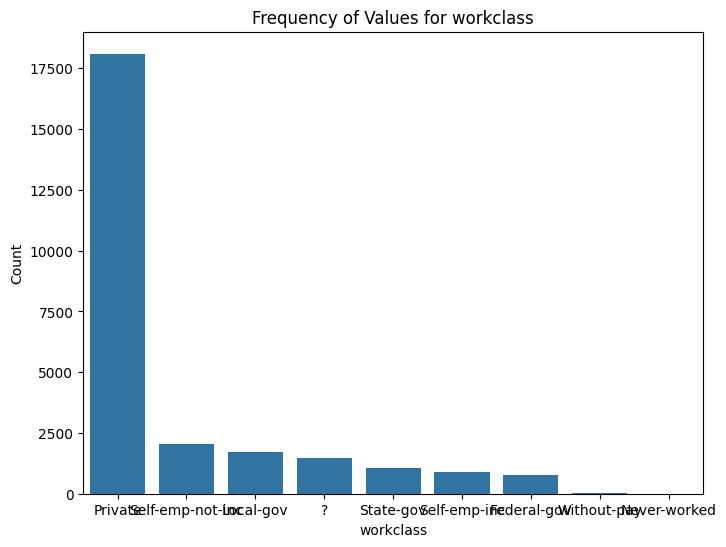

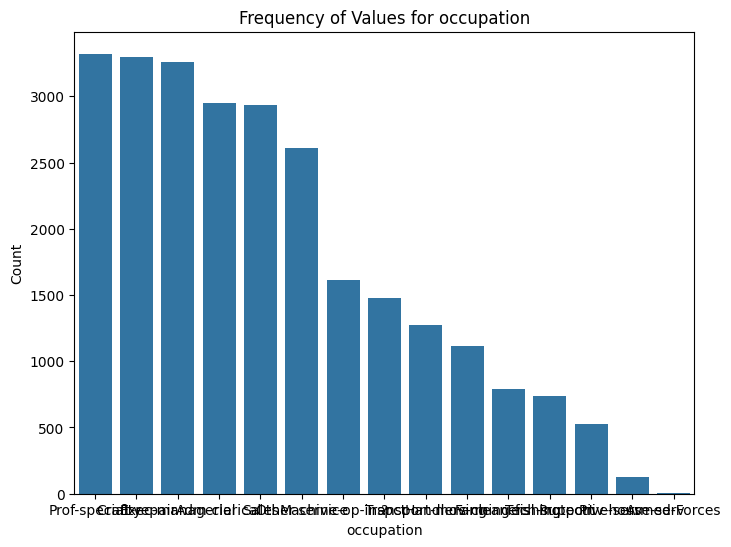

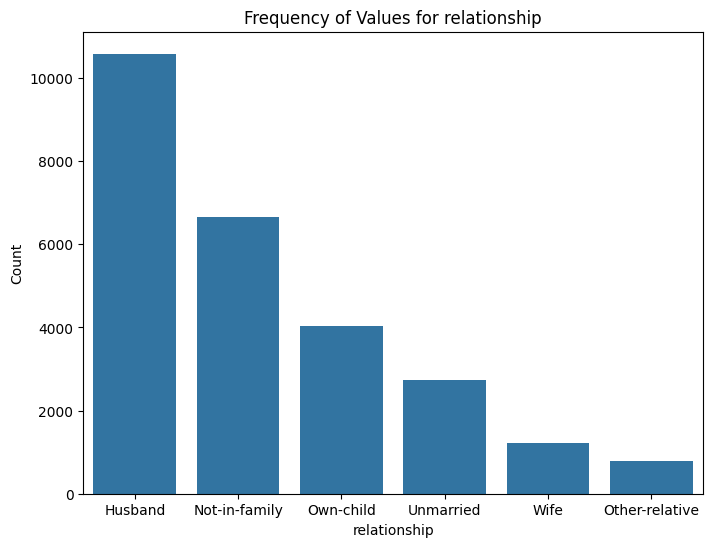

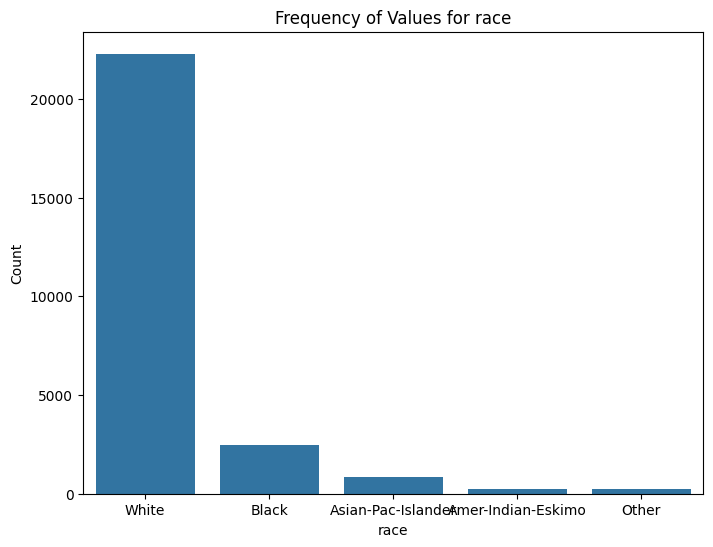

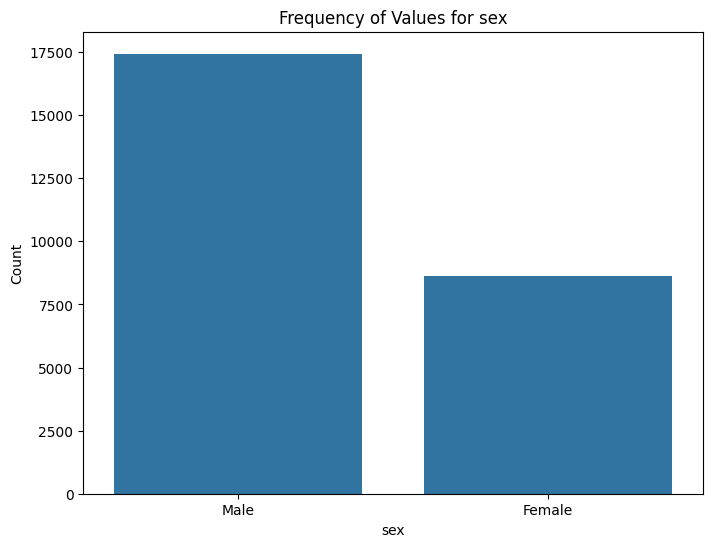

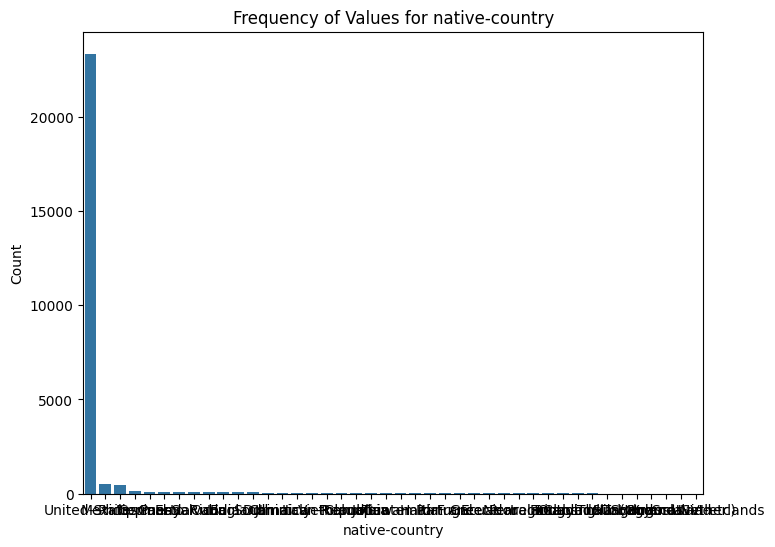

In [33]:
# < ENTER YOUR CODE HERE > 
non_numeric_features = df.select_dtypes(exclude=['int64', 'float64']).columns

for feature in non_numeric_features:
    plt.figure(figsize=(8, 6))
    sns.barplot(x=df[feature].value_counts().index, y=df[feature].value_counts())
    plt.title(f'Frequency of Values for {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

## Removing missing values

Determine the number of rows in the original dataset (without columns <code>education</code> and <code>marital-status</code>) that contain at least one missing value.

In [39]:
# < ENTER YOUR CODE HERE > 
len(df[df.eq("?").any(axis=1)])

1914

In [40]:
1914/26048

0.07347972972972973

You can see that the dataset contains less than 10% of rows that contain missing values. Throwing out such a large number of rows is not a good thing, but why not try to train model without them. 

Remove rows containing missing values. Perform <code>one-hot</code> encoding of non-numeric features, e.g., using <code>pd.get_dummies(drop_first=True)</code>.

Enter the total number of features obtained.

In [ ]:
# < ENTER YOUR CODE HERE > 
df_missing = df[~df.eq("?").any(axis=1)]

non_numeric_features = df_missing.select_dtypes(exclude=['int64', 'float64']).columns
df_missing_encoded = pd.get_dummies(df_missing, columns=non_numeric_features, drop_first=True)
df_missing_encoded

Using the resulting dataset, train the classification model in the same way as was done for the baseline model. Compute <code>f1_score()</code> for the test dataset.



In [45]:
# < ENTER YOUR CODE HERE > 
train_data, test_data = train_test_split(df_missing_encoded, test_size=0.2, random_state=21, stratify=df_missing_encoded['label'])

X_train = train_data.drop(columns = ['label'])
y_train = train_data['label']
X_test = test_data.drop(columns = 'label')
y_test = test_data['label']

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
y_train
X_test_scaled = scaler.transform(X_test)
y_test

model = KNeighborsClassifier()
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Compute F1 score
f1 = f1_score(y_test, y_pred)
print(round(f1,3))

0.592


The quality of the model increased compared to the model that used only numerical features.

## Filling missing values

Perhaps the quality would be further improved by using rows with missing values. Using the original dataset (without columns <code>education</code> and <code>marital-status</code>), fill the missing values with the most frequent value within the column.

In [51]:
# < ENTER YOUR CODE HERE > 
df_filled = df.replace("?", pd.NA).apply(lambda x: x.fillna(x.mode()[0]))
non_numeric_features = df_filled.select_dtypes(exclude=['int64', 'float64']).columns
df_filled_encoded = pd.get_dummies(df_filled, columns=non_numeric_features, drop_first=True)
df_filled_encoded

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,label,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,32,37210,13,0,0,45,1,False,False,True,...,False,False,False,False,False,False,False,True,False,False
1,43,101950,14,0,0,45,0,False,False,True,...,False,False,False,False,False,False,False,True,False,False
2,20,122244,9,0,0,28,0,False,False,True,...,False,False,False,False,False,False,False,True,False,False
3,40,24763,10,6849,0,40,0,True,False,False,...,False,False,False,False,False,False,False,True,False,False
4,24,113936,13,0,0,40,0,False,False,True,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26043,35,179171,9,0,0,38,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
26044,39,421633,10,0,0,30,0,False,False,True,...,False,False,False,False,False,False,False,True,False,False
26045,55,82098,9,0,0,55,0,False,False,True,...,False,False,False,False,False,False,False,True,False,False
26046,26,50053,13,0,0,55,0,False,False,True,...,False,False,False,False,False,False,False,True,False,False


In [53]:
df.mode()

,age,workclass,fnlwgt,education-num,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
0,31,Private,121124,9,Prof-specialty,Husband,White,Male,0,0,40,United-States,0


The next scenario is the familiar one: <code>one-hot</code>, <code>split</code>, <code>scaling</code>, training, and evaluation.

Compute the <code>f1_score()</code> of the model.

In [54]:
# < ENTER YOUR CODE HERE > 
train_data, test_data = train_test_split(df_filled_encoded, test_size=0.2, random_state=21, stratify=df_filled_encoded['label'])

X_train = train_data.drop(columns = ['label'])
y_train = train_data['label']
X_test = test_data.drop(columns = 'label')
y_test = test_data['label']

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
y_train
X_test_scaled = scaler.transform(X_test)
y_test

model = KNeighborsClassifier()
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Compute F1 score
f1 = f1_score(y_test, y_pred)
print(round(f1,3))

0.604
